<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_3_Comparacion_Modelos_Regresion_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 3: Comparación de Métricas en Modelos de Regresión**
#### Análisis del impacto de diferentes métricas en la evaluación de un modelo de regresión para predecir la vida útil de motores industriales

### **Introducción**
En este ejercicio, exploraremos cómo diferentes métricas de evaluación afectan la interpretación de un modelo de regresión.

El dataset utilizado contiene información sobre motores industriales y su **vida útil restante**. Evaluaremos cómo métricas como **MSE, RMSE, MAE y R²** afectan la comprensión del rendimiento del modelo.

También discutiremos el impacto de los **valores atípicos** en estas métricas y en qué situaciones es más adecuado utilizar una métrica en lugar de otra.

In [1]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de gráficos
sns.set(style='whitegrid')

In [2]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_motores_industriales.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_motor,Horas_operacion,Temperatura_nucleo,Vibración,Consumo_energia,Tipo_aceite,Presion_sistema,Corriente_motor,Velocidad_rotacion,Desgaste_rodamientos,Fecha_instalación,Vida_util_restante
0,1,7770,81.610466,46.604460,318.231332,Aceite_A,2.295591,11.211465,2438,0.785107,2022-12-17,11445.208345
1,2,1360,68.652613,56.835307,347.379296,Aceite_C,2.236013,8.837599,1948,0.424782,2020-01-05,14162.529287
2,3,5890,62.997601,57.301942,276.613228,Aceite_C,1.896182,10.717229,2141,0.546722,2022-11-01,11713.160348
3,4,5691,61.966363,60.366103,259.887709,Aceite_C,1.642541,11.554843,1413,0.481573,2015-07-13,12164.564367
4,5,11784,84.117229,44.860333,334.598166,Aceite_B,2.078624,8.298306,2064,0.610559,2015-11-16,9181.087673


In [3]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_motor              30000 non-null  int64  
 1   Horas_operacion       30000 non-null  int64  
 2   Temperatura_nucleo    30000 non-null  float64
 3   Vibración             30000 non-null  float64
 4   Consumo_energia       30000 non-null  float64
 5   Tipo_aceite           30000 non-null  object 
 6   Presion_sistema       30000 non-null  float64
 7   Corriente_motor       30000 non-null  float64
 8   Velocidad_rotacion    30000 non-null  int64  
 9   Desgaste_rodamientos  30000 non-null  float64
 10  Fecha_instalación     30000 non-null  object 
 11  Vida_util_restante    30000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 2.7+ MB


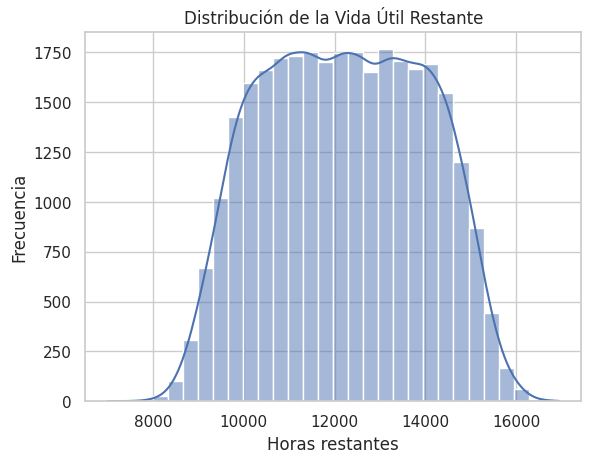

In [4]:
# Celda 4: Distribución de la variable objetivo
sns.histplot(data['Vida_util_restante'], bins=30, kde=True)
plt.title('Distribución de la Vida Útil Restante')
plt.xlabel('Horas restantes')
plt.ylabel('Frecuencia')
plt.show()

### **Preprocesamiento de los datos**
Se realizará un proceso estándar de preparación de datos que incluye:
- Eliminación de duplicados.
- Imputación de valores faltantes.
- Codificación de variables categóricas.
- Normalización de variables numéricas.
- Transformación de la variable de fecha en una variable numérica útil.

In [5]:
data

,ID_motor,Horas_operacion,Temperatura_nucleo,Vibración,Consumo_energia,Tipo_aceite,Presion_sistema,Corriente_motor,Velocidad_rotacion,Desgaste_rodamientos,Fecha_instalación,Vida_util_restante
0,1,7770,81.610466,46.604460,318.231332,Aceite_A,2.295591,11.211465,2438,0.785107,2022-12-17,11445.208345
1,2,1360,68.652613,56.835307,347.379296,Aceite_C,2.236013,8.837599,1948,0.424782,2020-01-05,14162.529287
2,3,5890,62.997601,57.301942,276.613228,Aceite_C,1.896182,10.717229,2141,0.546722,2022-11-01,11713.160348
3,4,5691,61.966363,60.366103,259.887709,Aceite_C,1.642541,11.554843,1413,0.481573,2015-07-13,12164.564367
4,5,11784,84.117229,44.860333,334.598166,Aceite_B,2.078624,8.298306,2064,0.610559,2015-11-16,9181.087673
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,6960,62.534145,38.446396,320.914854,Aceite_A,2.087008,11.542012,2518,0.473544,2023-06-15,12189.214813
29996,29997,517,79.874380,49.266745,346.536275,Aceite_C,2.686300,8.073714,3458,0.542684,2015-01-05,15232.534706
29997,29998,3033,81.172395,74.256613,306.465359,Aceite_C,2.326598,7.439147,2584,0.389728,2015-03-08,14203.235818
29998,29999,7010,45.454117,41.616054,303.290572,Aceite_A,1.667616,9.041847,2528,0.403335,2023-01-20,12372.116588


In [6]:
# Celda 5: Procesamiento de datos
# Eliminar duplicados
data = data.drop_duplicates()

# Convertir la fecha en una variable numérica (días desde la instalación)
data['Fecha_instalación'] = pd.to_datetime(data['Fecha_instalación'])
data['Dias_desde_instalacion'] = (pd.to_datetime('today') - data['Fecha_instalación']).dt.days
data.drop(columns=['Fecha_instalación'], inplace=True)

# Imputar valores faltantes con la mediana para variables numéricas
numeric_features = ['Horas_operacion', 'Temperatura_nucleo', 'Vibración', 'Consumo_energia', 'Presion_sistema', 'Corriente_motor', 'Velocidad_rotacion', 'Desgaste_rodamientos', 'Dias_desde_instalacion']
imputer = SimpleImputer(strategy='median')
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Codificar variables categóricas con OneHotEncoder
categorical_features = ['Tipo_aceite']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# División en variables predictoras y objetivo
X = data.drop(columns=['Vida_util_restante'])
y = data['Vida_util_restante']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Celda 6: Entrenamiento del modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [8]:
# Celda 7: Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

Error Absoluto Medio (MAE): 396.72
Error Cuadrático Medio (MSE): 246650.67
Raíz del Error Cuadrático Medio (RMSE): 496.64
Coeficiente de Determinación (R²): 0.92


### **Comentario sobre las métricas**

Estas métricas indican que el modelo tiene un buen rendimiento general:

MAE = 396.72: En promedio, las predicciones del modelo se desvían unos 397 unidades del valor real.

MSE = 246,650.67 y RMSE = 496.64: El RMSE penaliza más los errores grandes; al ser solo ligeramente superior al MAE, sugiere que no hay muchos errores extremos.

R² = 0.92: El modelo explica el 92% de la varianza de los datos reales, lo cual indica un ajuste bastante preciso.

En conjunto, estas métricas reflejan un modelo bien ajustado, preciso y con errores relativamente bajos.

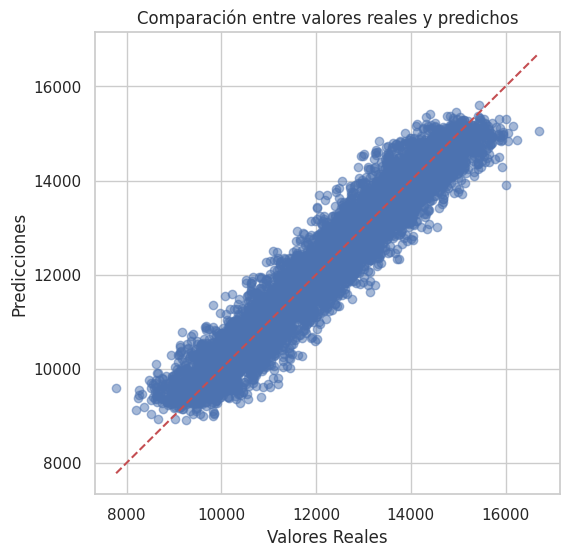

In [9]:
# Celda 8: Comparación de valores reales vs predicciones
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos')
plt.show()

### **Conclusiones**
- **MAE** mide el error absoluto promedio, útil para interpretar en la escala original.
- **MSE** penaliza más los errores grandes debido a la elevación al cuadrado.
- **RMSE** es más intuitivo ya que está en la misma escala que la variable objetivo.
- **R²** indica qué tan bien el modelo explica la variabilidad de `y`.

**Posibles mejoras:**
- Ajustar los hiperparámetros del modelo.
- Manejar mejor los valores atípicos para mejorar la precisión.
- Evaluar el uso de modelos más avanzados como **Regresión Ridge o Random Forest**.